--2025-09-14 13:45:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘ENB2012_data.xlsx’

ENB2012_data.xlsx       [ <=>                ]  74.40K  --.-KB/s    in 0.1s    

2025-09-14 13:45:08 (545 KB/s) - ‘ENB2012_data.xlsx’ saved [76189]

Dataset Shape: (768, 10)

Dataset Columns:
Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

First 5 rows:
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.

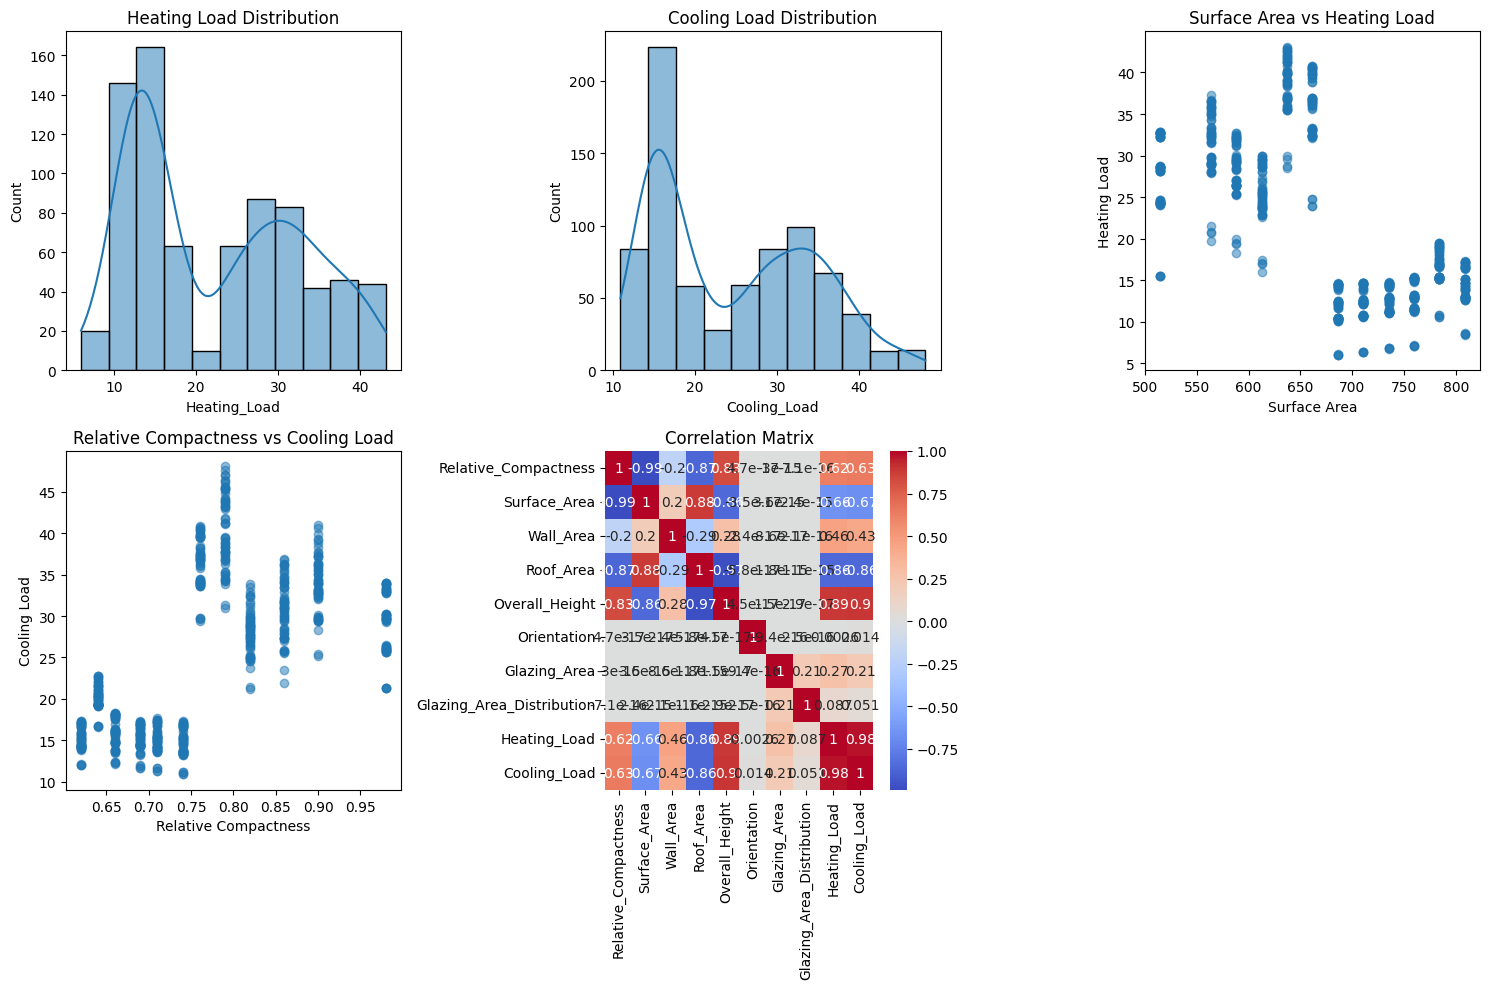

Heating Load Prediction Performance:
Mean Squared Error: 9.15320764594167
R2 Score: 0.9121846294352439

Cooling Load Prediction Performance:
Mean Squared Error: 9.893427647944089
R2 Score: 0.8932255268607288


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mounted at /content/drive
cp: cannot stat '/content/CSE_Assignment_Building_Energy_Efficiency.ipynb': No such file or directory


In [1]:
# -*- coding: utf-8 -*-
"""CSE_Assignment_Building_Energy_Efficiency.ipynb

Automatically generated by Colaboratory.

Original file is located at:
    https://colab.research.google.com/drive/1YJVqVg9hZ_3VQ3kL9Z4p7Jd6eH6D4fBz

# Building Energy Efficiency Analysis
"""

# Install necessary libraries
!pip install kaggle
!pip install seaborn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Download the dataset directly
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx

# Load the dataset
df = pd.read_excel('ENB2012_data.xlsx')

# Display dataset information
print("Dataset Shape:", df.shape)
print("\nDataset Columns:")
print(df.columns)
print("\nFirst 5 rows:")
print(df.head())

# Rename columns for better understanding
column_names = {
    'X1': 'Relative_Compactness',
    'X2': 'Surface_Area',
    'X3': 'Wall_Area',
    'X4': 'Roof_Area',
    'X5': 'Overall_Height',
    'X6': 'Orientation',
    'X7': 'Glazing_Area',
    'X8': 'Glazing_Area_Distribution',
    'Y1': 'Heating_Load',
    'Y2': 'Cooling_Load'
}

df = df.rename(columns=column_names)
print("\nRenamed columns:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics
print("\nDataset statistics:")
print(df.describe())

# Data Visualization
plt.figure(figsize=(15, 10))

# Heating Load distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Heating_Load'], kde=True)
plt.title('Heating Load Distribution')

# Cooling Load distribution
plt.subplot(2, 3, 2)
sns.histplot(df['Cooling_Load'], kde=True)
plt.title('Cooling Load Distribution')

# Relationship between Surface Area and Heating Load
plt.subplot(2, 3, 3)
plt.scatter(df['Surface_Area'], df['Heating_Load'], alpha=0.5)
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.title('Surface Area vs Heating Load')

# Relationship between Relative Compactness and Cooling Load
plt.subplot(2, 3, 4)
plt.scatter(df['Relative_Compactness'], df['Cooling_Load'], alpha=0.5)
plt.xlabel('Relative Compactness')
plt.ylabel('Cooling Load')
plt.title('Relative Compactness vs Cooling Load')

# Correlation heatmap
plt.subplot(2, 3, 5)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

# Prepare data for machine learning
X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y_heating = df['Heating_Load']
y_cooling = df['Cooling_Load']

# Split the data
X_train, X_test, y_heating_train, y_heating_test = train_test_split(X, y_heating, test_size=0.2, random_state=42)
_, _, y_cooling_train, y_cooling_test = train_test_split(X, y_cooling, test_size=0.2, random_state=42)

# Train models
heating_model = LinearRegression()
heating_model.fit(X_train, y_heating_train)

cooling_model = LinearRegression()
cooling_model.fit(X_train, y_cooling_train)

# Make predictions
heating_predictions = heating_model.predict(X_test)
cooling_predictions = cooling_model.predict(X_test)

# Evaluate models
print("Heating Load Prediction Performance:")
print("Mean Squared Error:", mean_squared_error(y_heating_test, heating_predictions))
print("R2 Score:", r2_score(y_heating_test, heating_predictions))

print("\nCooling Load Prediction Performance:")
print("Mean Squared Error:", mean_squared_error(y_cooling_test, cooling_predictions))
print("R2 Score:", r2_score(y_cooling_test, cooling_predictions))

# Save processed data
df.to_csv('energy_efficiency_processed.csv', index=False)

# Download the processed file
from google.colab import files
files.download('energy_efficiency_processed.csv')

# Save the notebook
from google.colab import drive
drive.mount('/content/drive')
!cp /content/CSE_Assignment_Building_Energy_Efficiency.ipynb /content/drive/MyDrive/